<a href="https://colab.research.google.com/github/Calista-F/show-and-tell/blob/master/Signal_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
wavelet based denoising of ECG signal
https://www.youtube.com/watch?v=HSG-gVALa84

"""
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd

x = pywt.data.ecg().astype(float)/256

sigma = 0.05
x_noisy = x + sigma * np.random.randn(x.size)
                                       
#DENOISING

x_denoised = denoise_wavelet(x_noisy, method = 'BayesShrink', mode ='soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma = 'True')

In [ ]:
np.random.randn?

In [ ]:
denoise_wavelet?

Text(0.5, 1.0, 'ECG data')

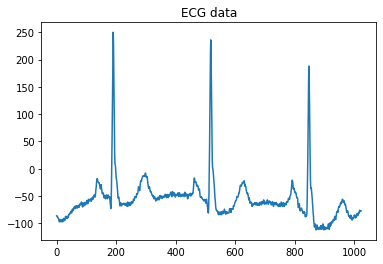

In [ ]:
plt.plot(pywt.data.ecg().astype(float))
plt.title('ECG data')

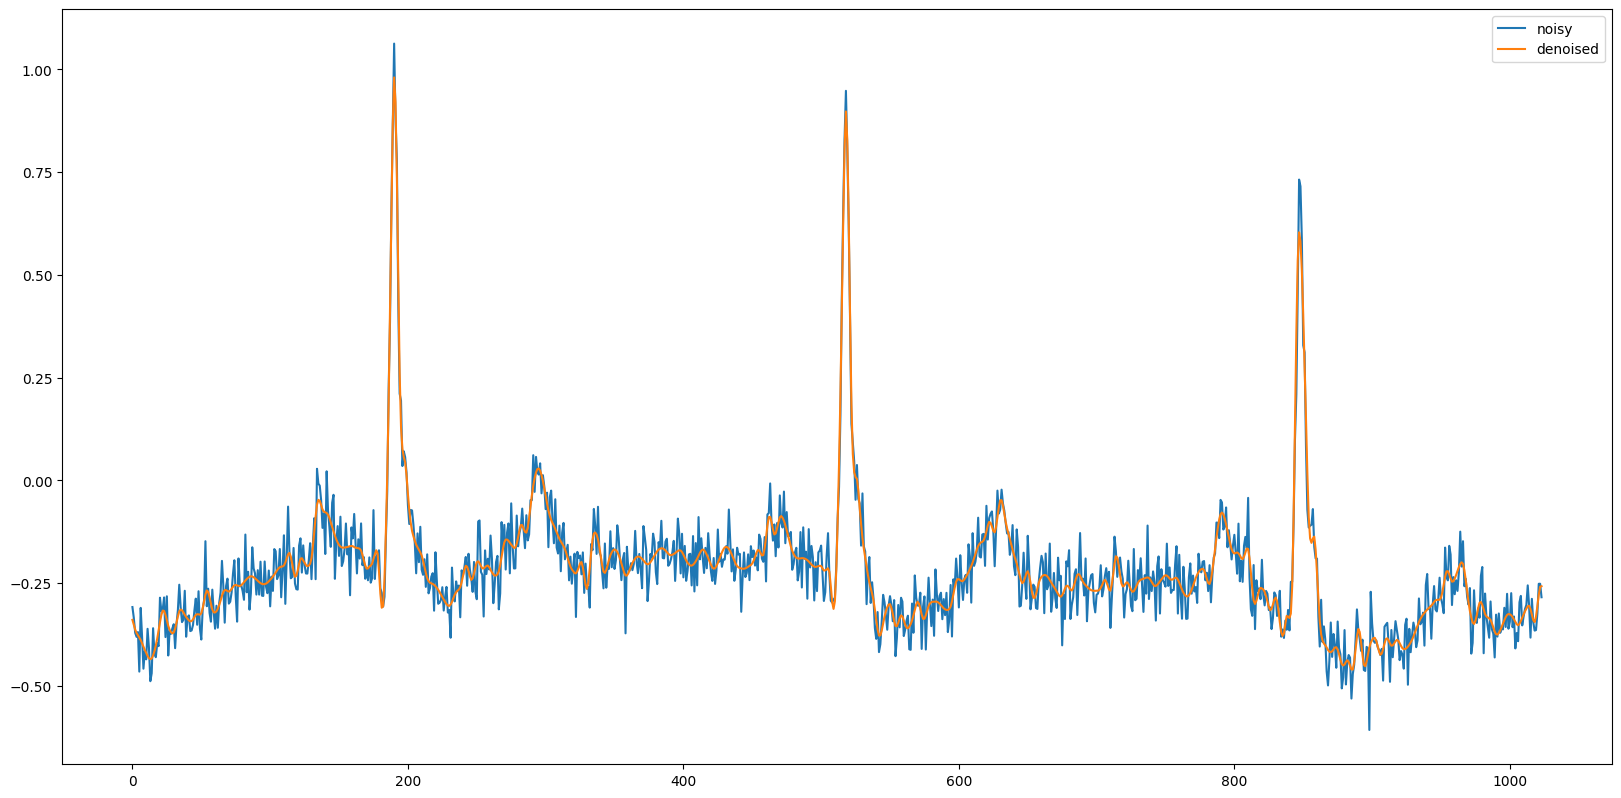

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
plt.plot(x_noisy, label = "noisy")
plt.plot(x_denoised, label = "denoised")
plt.legend()
plt.show()

# CCSN simmulation by Dimmelmeier 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ccsn_path = '/content/drive/MyDrive/Signals/CCSN_signal96_dist5.0.csv'

In [ ]:
ccsn_df = pd.read_csv(ccsn_path, names= ['time','signal + noise','signal template'])
ccsn_df.drop(ccsn_df.tail(1).index,inplace=True)
print(ccsn_df)

               time  signal + noise  signal template
0      1.130000e+09    5.820000e-21              0.0
1      1.130000e+09    1.180000e-23              0.0
2      1.130000e+09   -2.850000e-21              0.0
3      1.130000e+09   -3.680000e-21              0.0
4      1.130000e+09   -1.570000e-22              0.0
...             ...             ...              ...
49147  1.130000e+09    4.570000e-21              0.0
49148  1.130000e+09    4.020000e-21              0.0
49149  1.130000e+09    1.480000e-20              0.0
49150  1.130000e+09   -1.640000e-21              0.0
49151  1.130000e+09    6.840000e-21              0.0

[49152 rows x 3 columns]


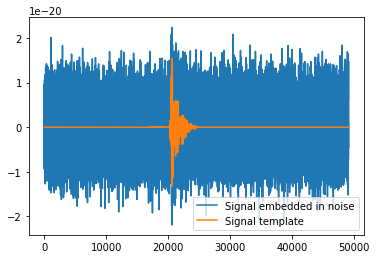

In [ ]:
torres_df = ccsn_df['signal + noise']
plt.plot(ccsn_df['signal + noise'], label ='Signal embedded in noise')
plt.plot(ccsn_df['signal template'], label ='Signal template')
plt.legend()

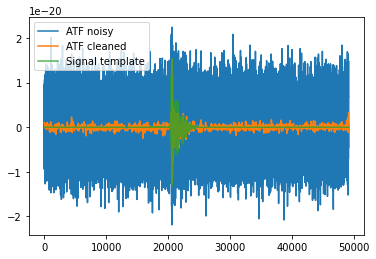

In [ ]:
torres_clean = denoise_wavelet(torres_df, method = 'VisuShrink', mode ='soft', wavelet_levels = 6, wavelet = 'sym8', rescale_sigma = 'False')
plt.plot(torres_df, label ='ATF noisy')
plt.plot(torres_clean, label ='ATF cleaned')
plt.plot(ccsn_df['signal template'], label ='Signal template',alpha=0.8)
plt.legend()

0       0.000438
1       0.000219
2       0.000301
3       0.000048
4       0.000119
          ...   
4996    0.000000
4997    0.000000
4998    0.000000
4999    0.000000
5000    0.000000
Name: signal template, Length: 5001, dtype: float64


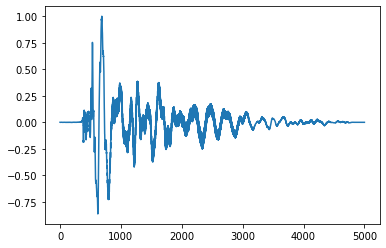

In [ ]:
signal_df = ccsn_df['signal template'].loc[20000:25000]
signal_df = signal_df/max(signal_df)
signal_df.reset_index(drop='True',inplace=True)
plt.plot(signal_df)
print(signal_df)

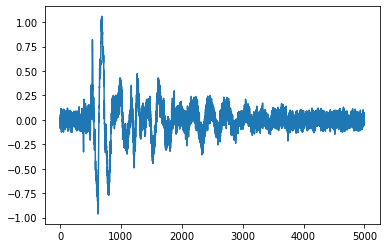

In [ ]:
sigma = 0.05
ccsnx_noisy = signal_df + sigma * np.random.randn(signal_df.size)
plt.plot(ccsnx_noisy)

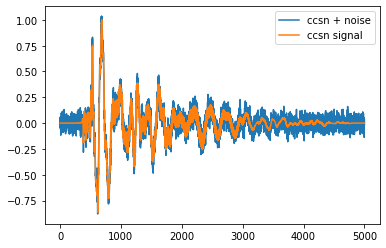

In [ ]:
plt.plot(ccsnx_noisy, label ='ccsn + noise')
plt.plot(signal_df, label ='ccsn signal')
plt.legend()

In [ ]:
ccsnx_denoised_b = denoise_wavelet(ccsnx_noisy, method = 'BayesShrink', mode ='soft', wavelet_levels = 5, wavelet = 'sym8', rescale_sigma = 'True')
ccsnx_denoised_v = denoise_wavelet(ccsnx_noisy, method = 'VisuShrink', mode ='soft', wavelet_levels = 5, wavelet = 'sym8', rescale_sigma = 'True')

In [ ]:
denoise_wavelet?

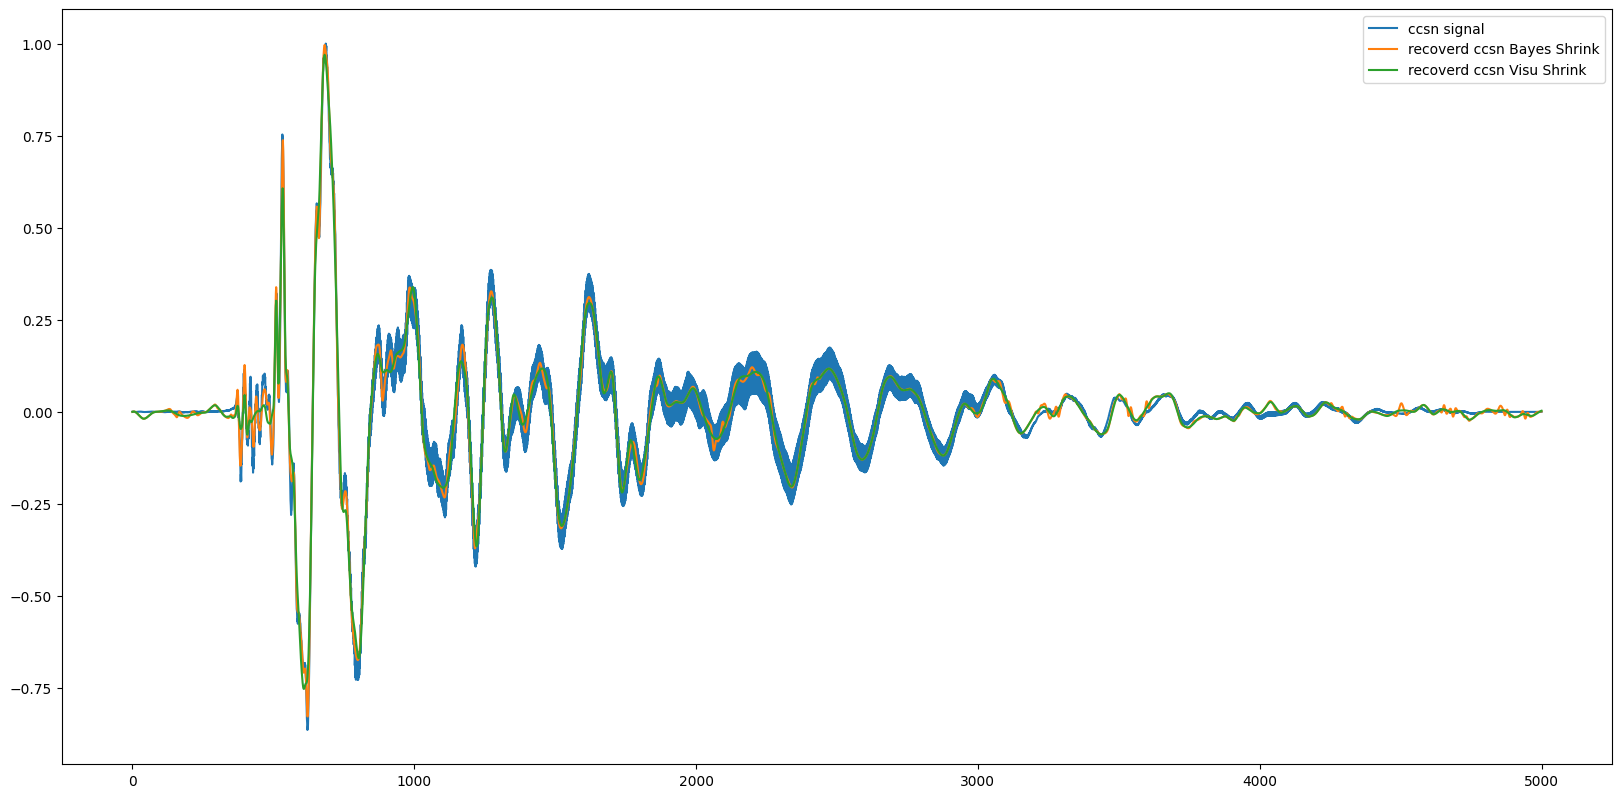

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
plt.plot(signal_df, label='ccsn signal')
plt.plot(ccsnx_denoised_b, label = 'recoverd ccsn Bayes Shrink')
plt.plot(ccsnx_denoised_v, label = 'recoverd ccsn Visu Shrink')
plt.legend()
plt.show()